In [106]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [107]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [108]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [109]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,20.,size=N)
sigma

array([13.77618553, 15.94036819, 12.93345302, 13.47861877, 16.63552621,
       18.79066566,  7.36579927,  3.88248059,  7.00489755, 10.95662622,
        9.9231965 ,  7.06068854,  4.35027471,  6.68912052, 10.64660981,
        7.15069573,  9.96484802, 11.33862684, 10.86472759,  9.52684203])

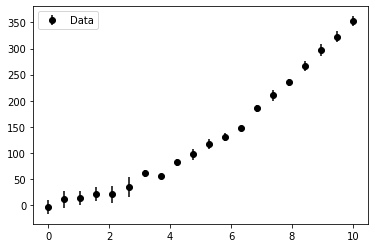

In [110]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [111]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [112]:
# Grado polinomial
n = 1
param = GetFit(x,y,n)
param

array([-45.46163845,  35.6566259 ])

In [113]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [114]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

35.6566259009329*x - 45.4616384480982

In [115]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

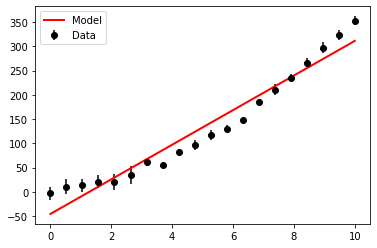

In [116]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()

In [117]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    print(sigma2)
    
    return Cov

In [118]:
Cov = GetError(x,y,param)
Cov

684.9651208613924


array([[127.2078106 , -18.59191095],
       [-18.59191095,   3.7183822 ]])

In [120]:
param

array([-45.46163845,  35.6566259 ])

In [122]:
a3 = param[1]
a3

35.65662590093289

In [101]:
sigmaa3 = np.sqrt(Cov[2,2])
sigmaa3

0.007802022641454136

In [103]:
tobs = np.abs((0. - np.abs(a3)))/sigmaa3
tobs

0.6567846550652696

In [104]:
df = N - len(param) - 1
df

16

In [105]:
tcritico = t.ppf(0.975,df=df)
tcritico

2.1199052992210112